<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/woe%2Civ_210220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
package_version(R.version)

[1] ‘4.0.4’

In [2]:
install.packages("Information")
install.packages("scorecard")
library(Information)

In [61]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
library(readxl)
library(data.table)
library(dplyr)
library(scorecard)
library(ggplot2)
library(ggridges)

In [121]:
cr_dt <- fread('/content/sample_data/credit .csv')
head(cr_dt)

goodbad,checking,history,purpose,savings,employed,installp,martial,coapp,resident,⋯,other,housing,job,depends,telephon,foreign,age,amount,duration,existcr
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
good,2,5,3,1,4,4,3,1,3,⋯,3,1,3,1,2,1,5,4,1,1
bad,1,3,1,1,2,4,2,1,3,⋯,3,1,3,1,2,1,1,1,2,1
good,4,5,4,1,3,1,2,1,1,⋯,3,2,3,1,2,1,3,2,1,2
good,4,3,1,1,3,3,4,1,2,⋯,3,2,3,1,2,1,3,1,1,2
good,1,3,1,2,4,4,3,1,3,⋯,3,2,4,2,2,1,4,4,2,1
good,4,5,2,5,5,2,3,1,4,⋯,3,3,3,1,1,1,5,5,3,2


In [122]:
goodbad <- as.factor(cr_dt$goodbad)
checking <- as.factor(cr_dt$checking)
history <- as.factor(cr_dt$history)
purpose <- as.factor(cr_dt$purpose)
savings	 <- as.factor(cr_dt$savings	)
employed <- as.factor(cr_dt$employed)
martial <- as.factor(cr_dt$martial)
coapp <- as.factor(cr_dt$coapp)
resident <- as.factor(cr_dt$resident)
property <- as.factor(cr_dt$property)
housing <- as.factor(cr_dt$housing)
job <- as.factor(cr_dt$job)
depends <- as.factor(cr_dt$depends)
telephon	 <- as.factor(cr_dt$telephon)
foreign <- as.factor(cr_dt$foreign)
age <- as.factor(cr_dt$age)
amount <- as.factor(cr_dt$amount)
duration	 <- as.factor(cr_dt$duration)
existcr <- as.factor(cr_dt$existcr)
installp <- as.factor(cr_dt$installp)
other <- as.factor(cr_dt$other)
existcr <- as.factor(cr_dt$existcr)
installp <- as.factor(cr_dt$installp)
credit <- data.frame(goodbad,checking,history,purpose,	savings,	employed,	martial,	coapp,	resident,	property, other, housing,	job,	depends,	telephon,	foreign,	age,	amount,	duration,	existcr	,installp)
head(credit)

,goodbad,checking,history,purpose,savings,employed,martial,coapp,resident,property,⋯,housing,job,depends,telephon,foreign,age,amount,duration,existcr,installp
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,good,2,5,3,1,4,3,1,3,3,⋯,1,3,1,2,1,5,4,1,1,4
2,bad,1,3,1,1,2,2,1,3,3,⋯,1,3,1,2,1,1,1,2,1,4
3,good,4,5,4,1,3,2,1,1,3,⋯,2,3,1,2,1,3,2,1,2,1
4,good,4,3,1,1,3,4,1,2,1,⋯,2,3,1,2,1,3,1,1,2,3
5,good,1,3,1,2,4,3,1,3,3,⋯,2,4,2,2,1,4,4,2,1,4
6,good,4,5,2,5,5,3,1,4,4,⋯,3,3,1,1,1,5,5,3,2,2


In [123]:
credit_iv <- credit %>%
  mutate(goodbad=as.integer(goodbad)-1)
  
credit_iv_dt <- create_infotables(data=credit_iv, y="goodbad", bins=10, parallel=TRUE)


credit_iv_dt


$Tables
$Tables$checking
  checking   N Percent        WOE        IV
1        1 274   0.274 -0.8180987 0.2056934
2        2 269   0.269 -0.4013918 0.2521402
3        3  63   0.063  0.4054651 0.2616010
4        4 394   0.394  1.1762632 0.6660115

$Tables$history
  history   N Percent         WOE         IV
1       1  40   0.040 -1.35812348 0.08407431
2       2  49   0.049 -1.13497993 0.15595637
3       3 530   0.530 -0.08831862 0.16016202
4       4  88   0.088 -0.08515781 0.16081084
5       5 293   0.293  0.73374058 0.29323355

$Tables$purpose
   purpose   N Percent         WOE         IV
1        1 234   0.234 -0.35920049 0.03215700
2       10  12   0.012 -0.51082562 0.03556250
3        2 103   0.103  0.77383609 0.08678308
4        3 181   0.181 -0.09555652 0.08846669
5        4 280   0.280  0.41006282 0.13142566
6        5  12   0.012 -0.15415068 0.13171928
7        6  22   0.022 -0.28768207 0.13363716
8        7  50   0.050 -0.60613580 0.15384168
9        8   9   0.009  1.23214368 0.

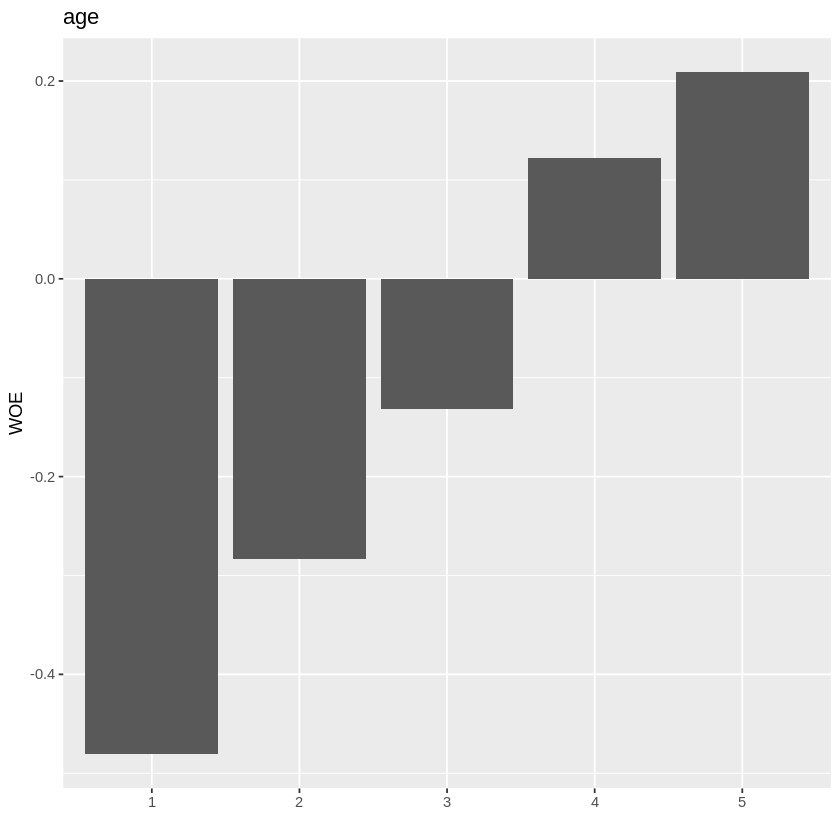

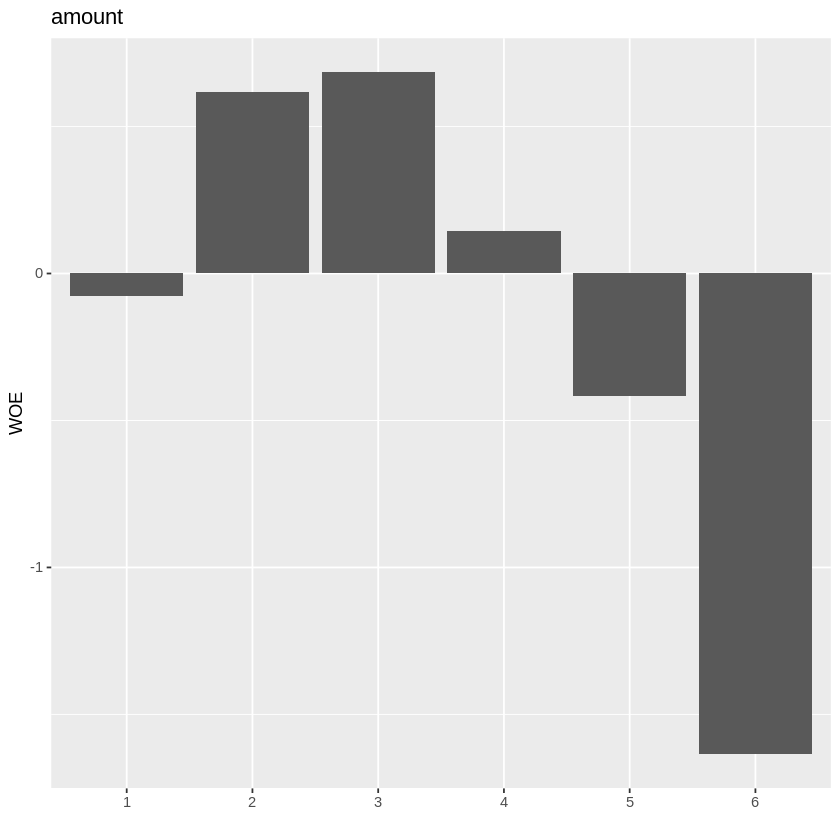

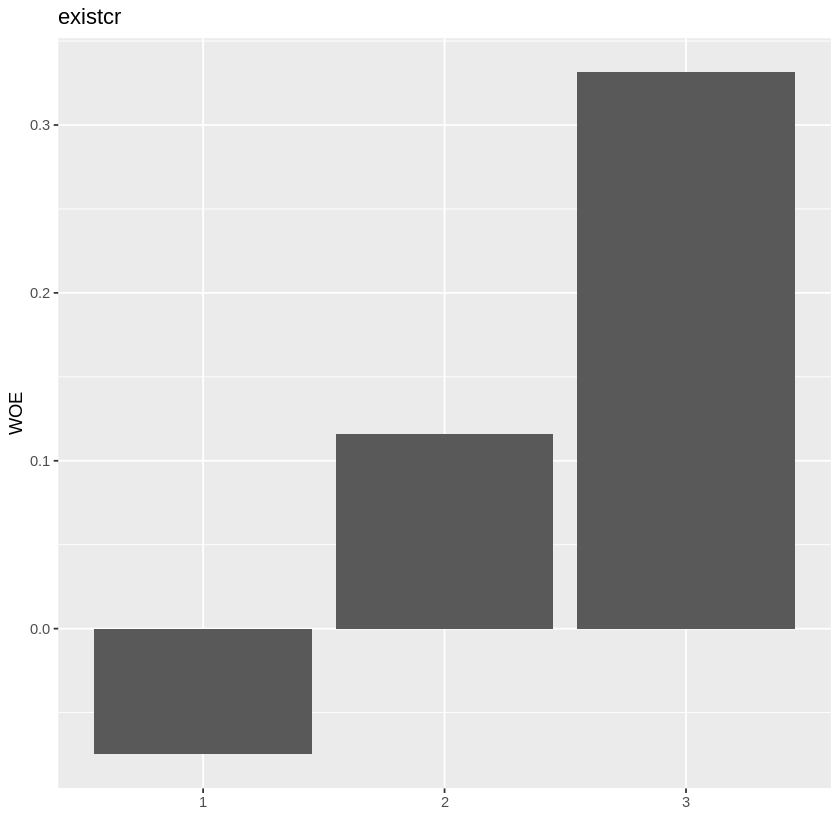

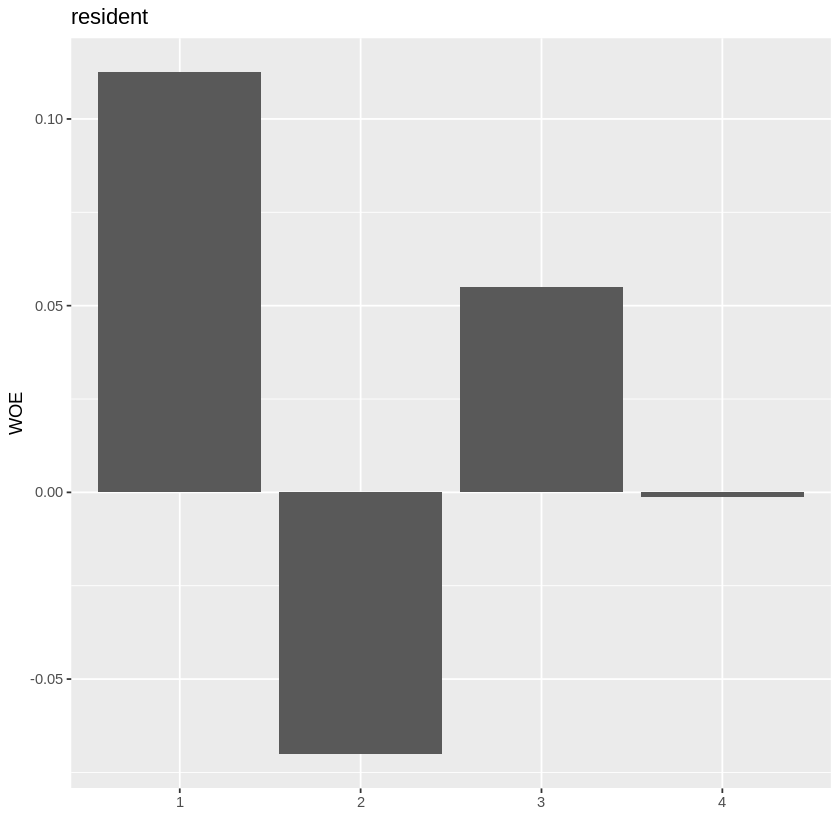

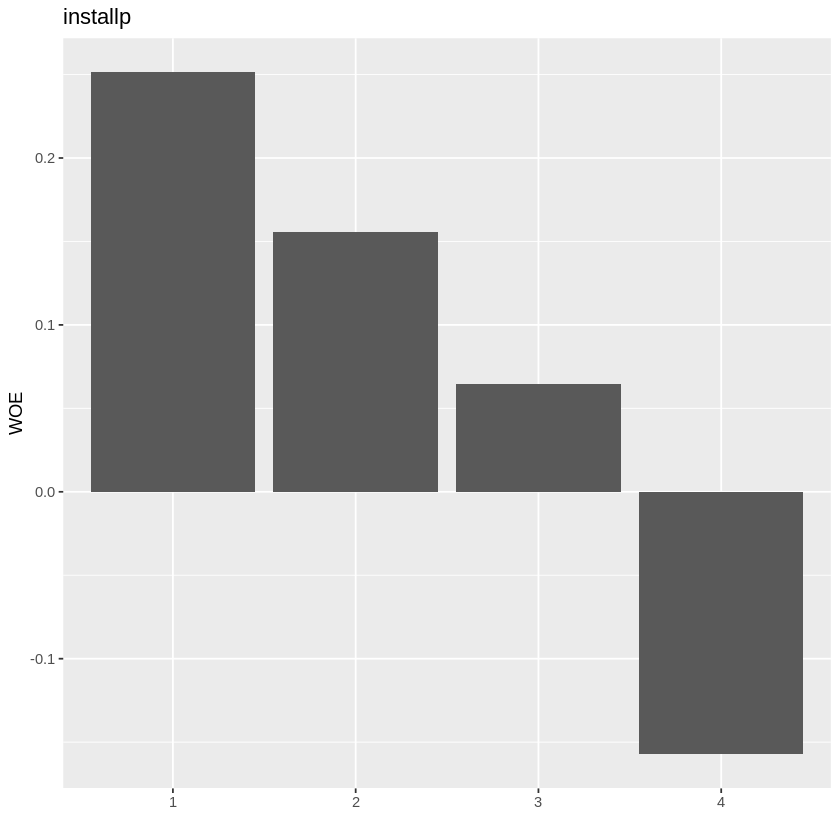

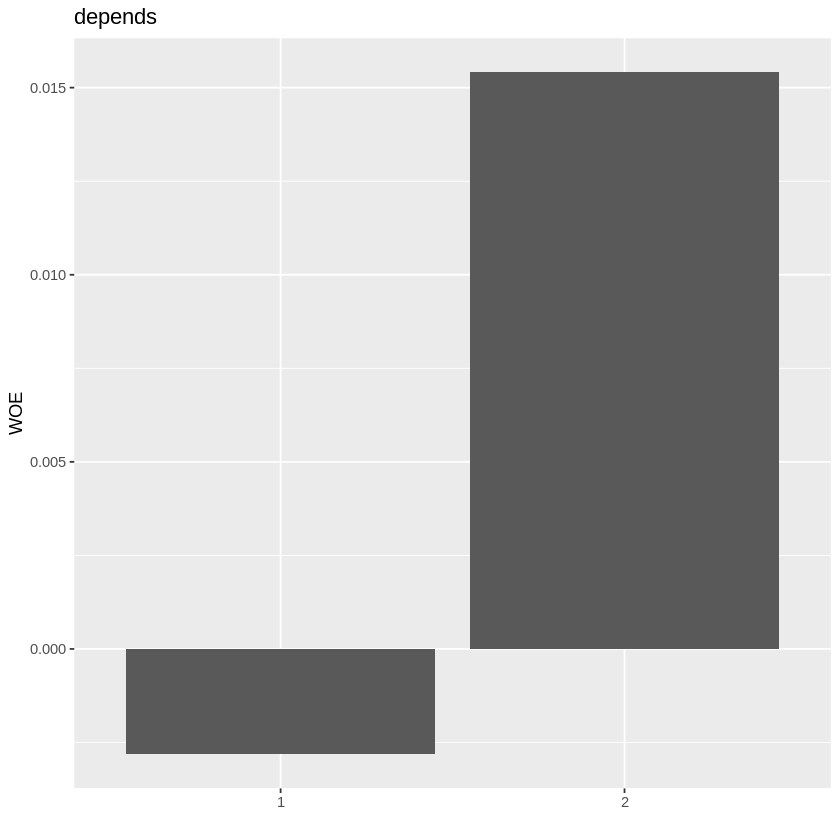

In [124]:
par(mfrow=c(4,2))
plot_infotables(credit_iv_dt, "age")
plot_infotables(credit_iv_dt, "amount")
plot_infotables(credit_iv_dt, "existcr")
plot_infotables(credit_iv_dt, "resident")
plot_infotables(credit_iv_dt, "installp")
plot_infotables(credit_iv_dt, "depends")

In [125]:
iv = iv(credit, y = 'goodbad') %>%
  as_tibble() %>%
  mutate( info_value = round(info_value, 3) ) %>%
  arrange( desc(info_value) )

iv %>%
  data.table()



variable,info_value
<chr>,<dbl>
checking,0.666
history,0.293
duration,0.216
savings,0.196
purpose,0.169
amount,0.155
property,0.113
employed,0.086
housing,0.083


In [127]:
bins = woebin(credit, y = 'goodbad')

[INFO] creating woe binning ... 


In [128]:
bins$age %>%
  knitr::kable()



|variable |bin   | count| count_distr| good| bad|   badprob|        woe|    bin_iv|  total_iv|breaks |is_special_values |
|:--------|:-----|-----:|-----------:|----:|---:|---------:|----------:|---------:|---------:|:------|:-----------------|
|age      |1     |   149|       0.149|   88|  61| 0.4093960|  0.4808349| 0.0373219| 0.0721843|1      |FALSE             |
|age      |2     |    91|       0.091|   58|  33| 0.3626374|  0.2833624| 0.0076913| 0.0721843|2      |FALSE             |
|age      |3     |   131|       0.131|   88|  43| 0.3282443|  0.1311612| 0.0023109| 0.0721843|3      |FALSE             |
|age      |4%,%5 |   629|       0.629|  466| 163| 0.2591415| -0.2031376| 0.0248602| 0.0721843|4%,%5  |FALSE             |

$age


$age


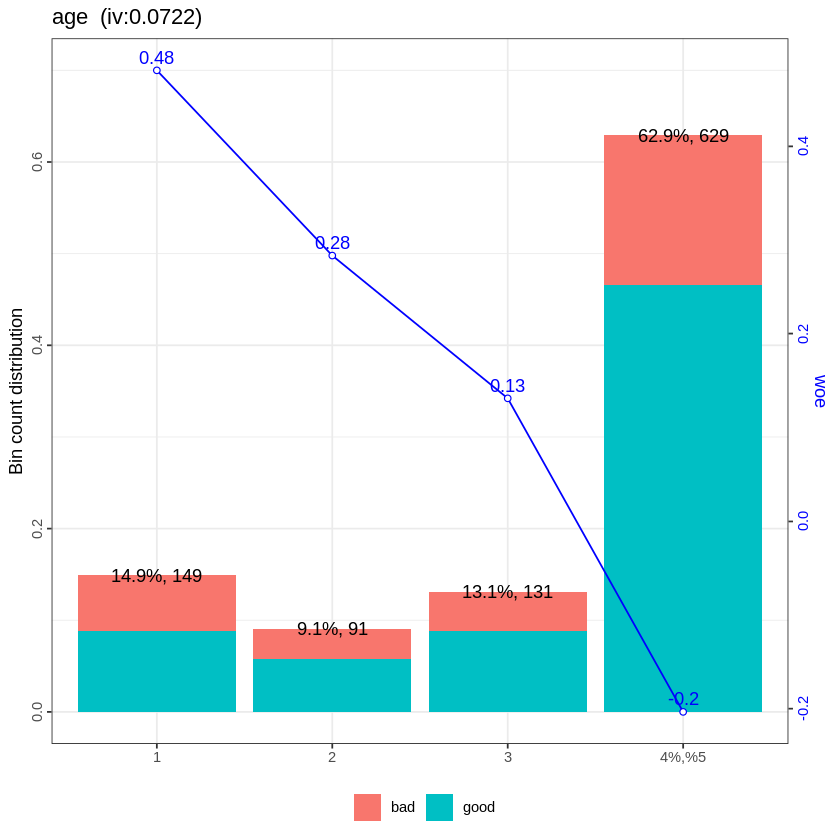

$duration


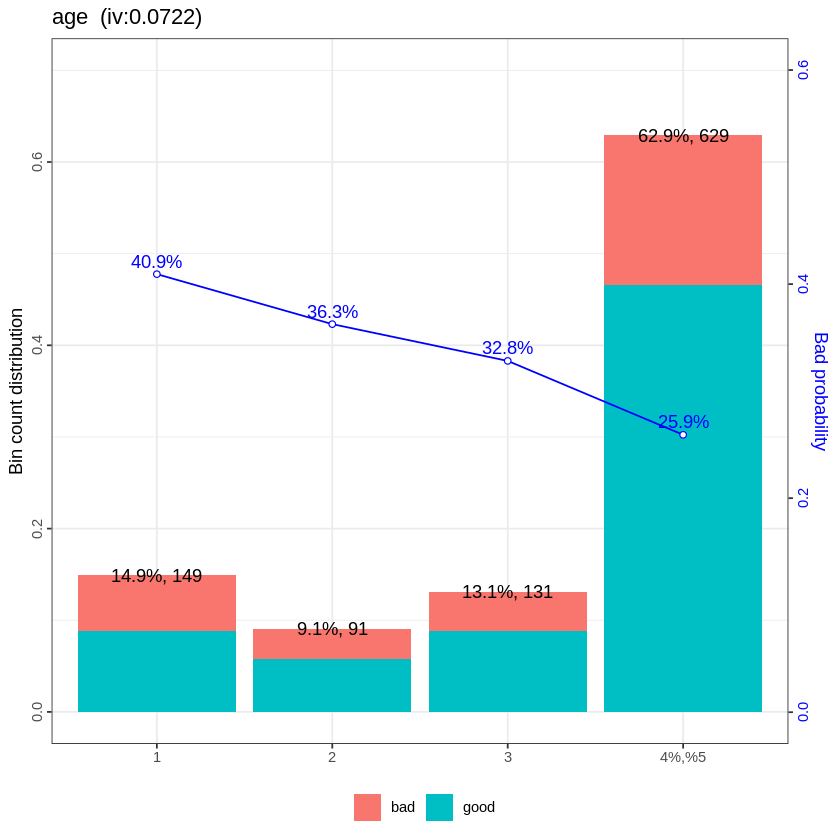

$amount


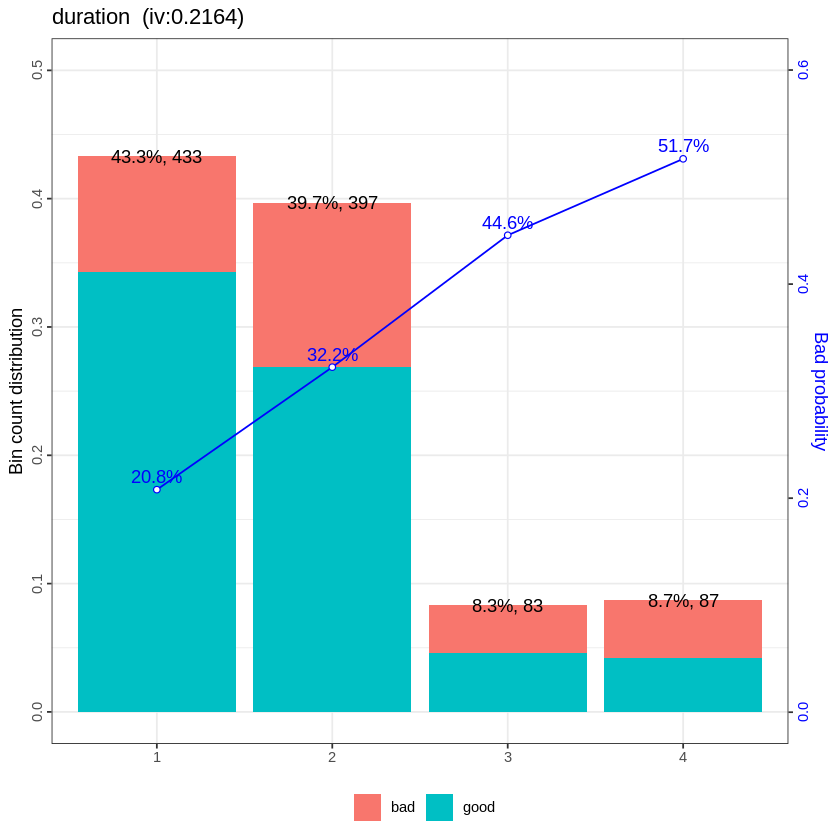

$existcr


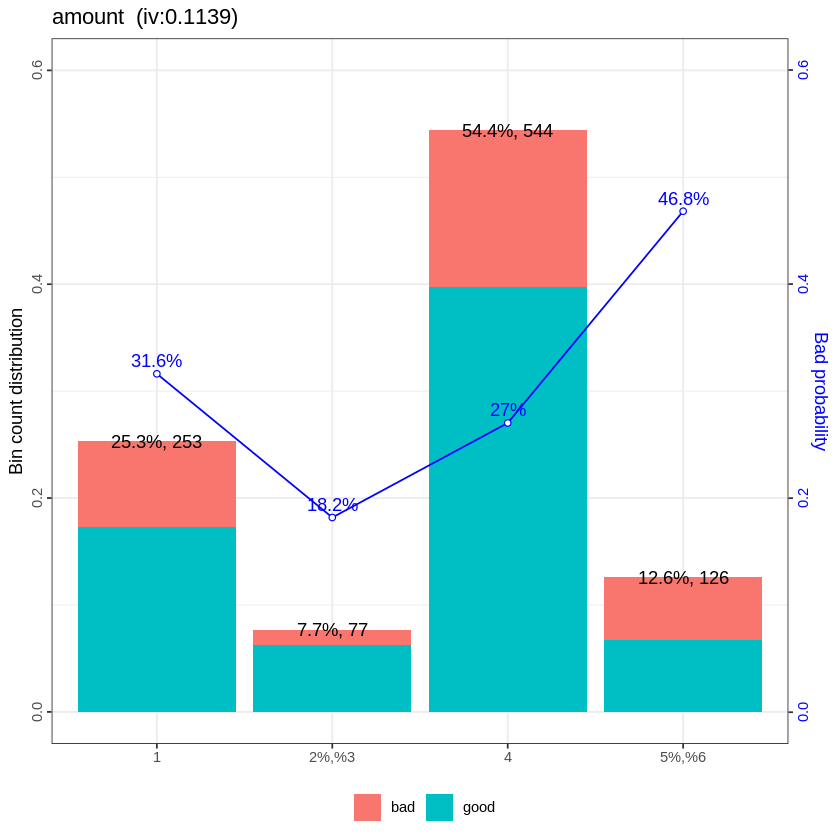

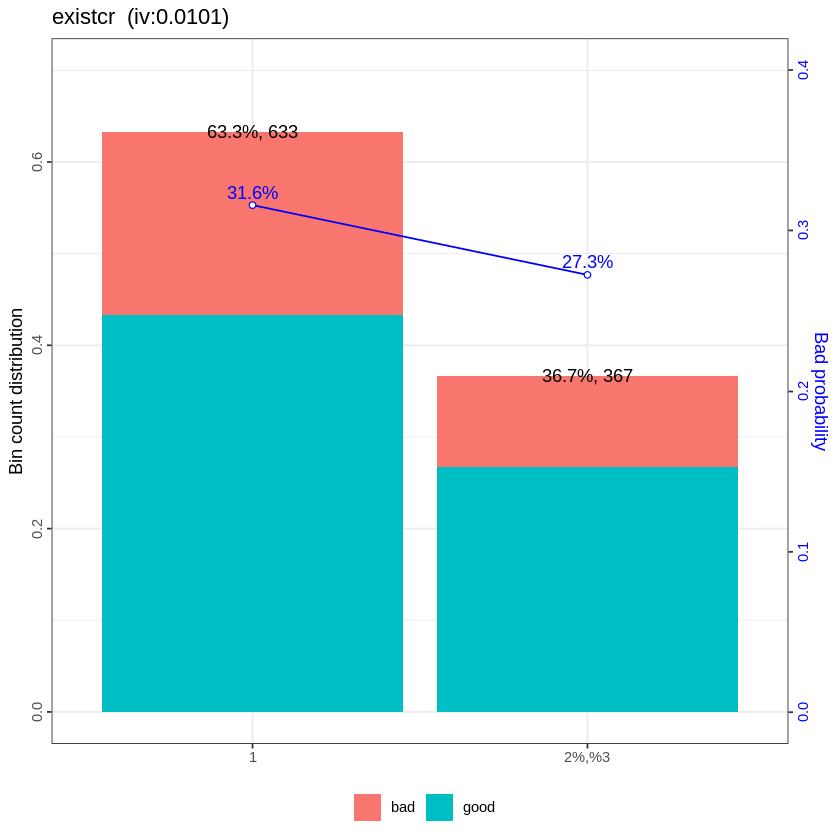

In [130]:
#decision tree로 binning 

woebin_plot(bins$age, line_value = 'woe')
woebin_plot(bins$age)
woebin_plot(bins$duration)
woebin_plot(bins$amount)
woebin_plot(bins$existcr)

$checking


$history


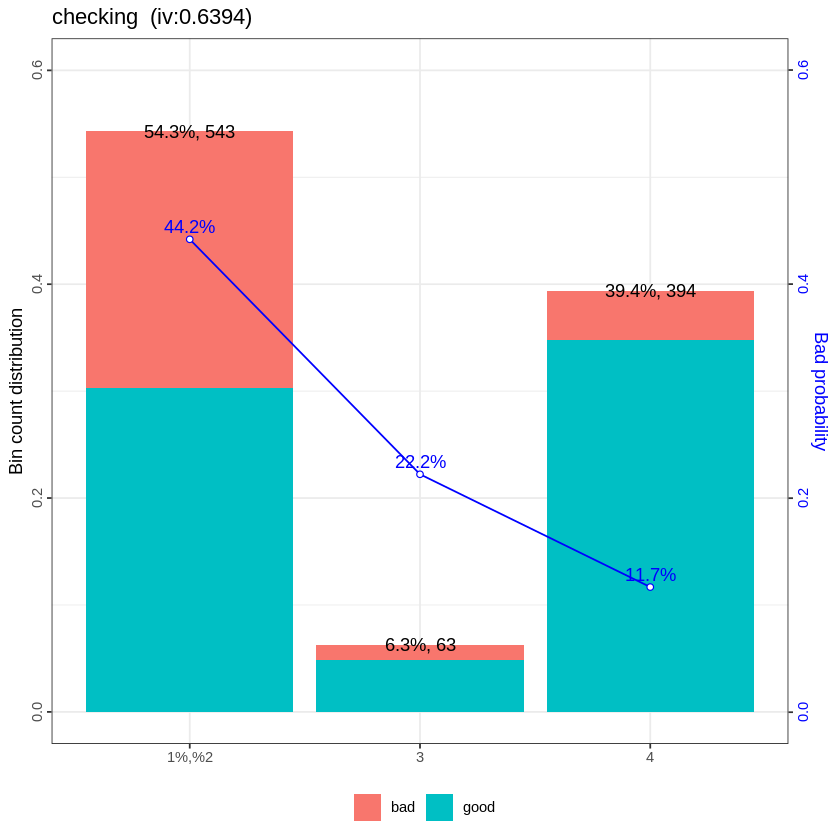

$savings


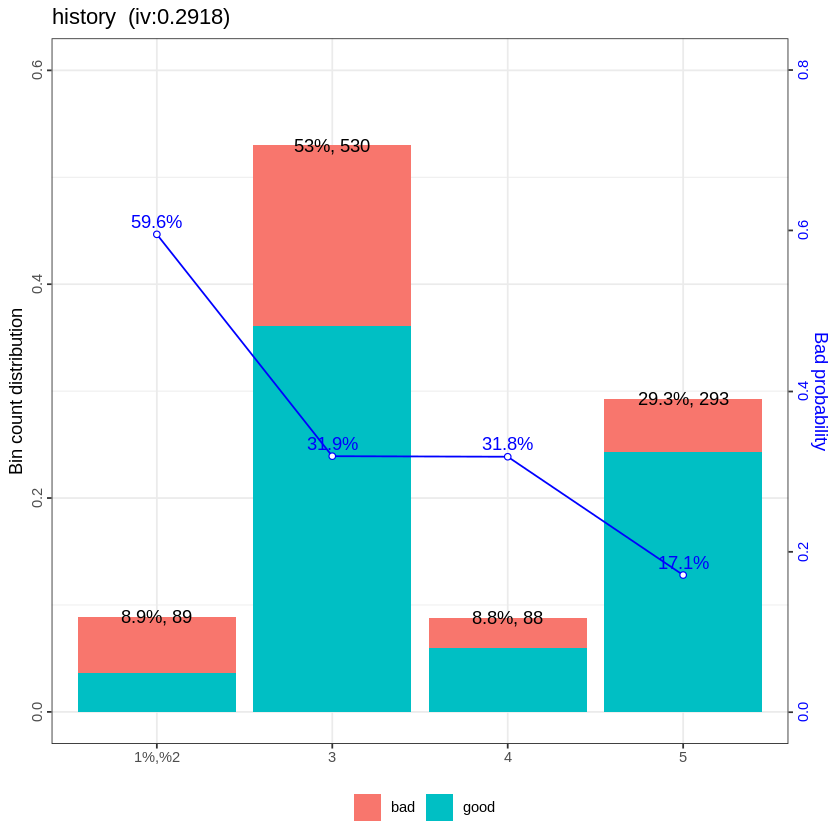

$property


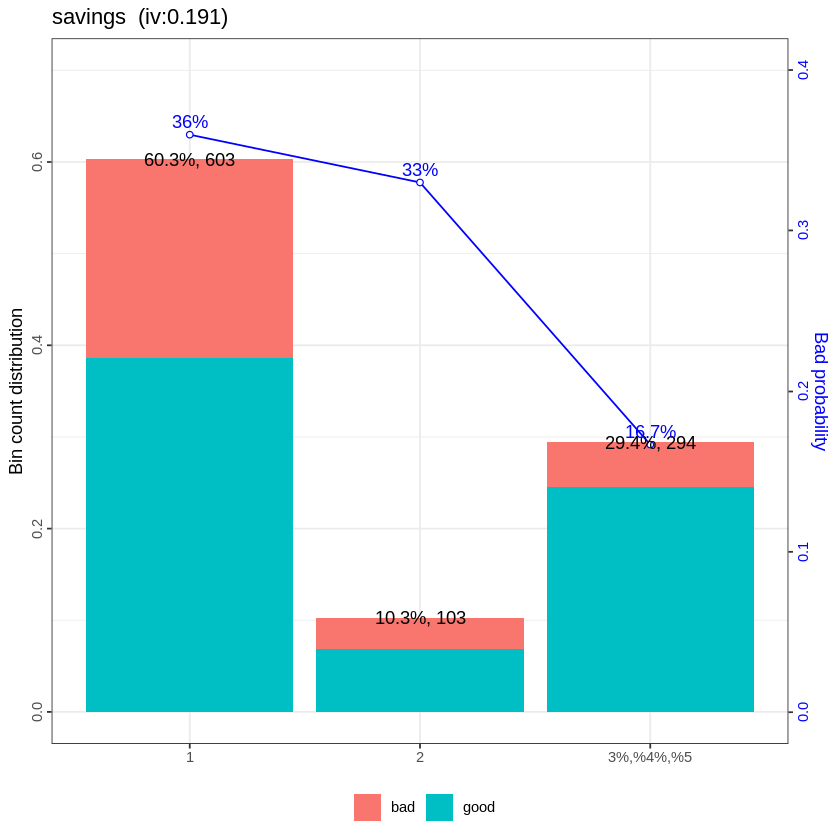

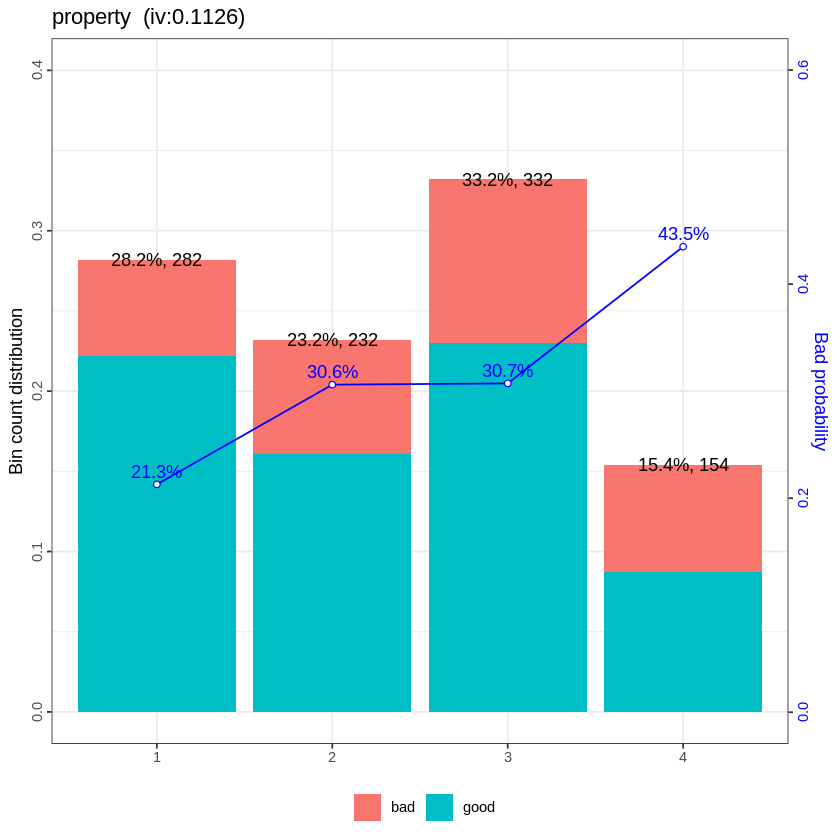

In [131]:
woebin_plot(bins$checking)
woebin_plot(bins$history)
woebin_plot(bins$savings)
woebin_plot(bins$property)
